In [166]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist #28x28, 0-9 arasindaki rakamlar

(x_train, y_train), (x_test, y_test) = mnist.load_data()

#scaling/normalize
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

In [167]:
#verilerin boyutlarini ogrenme
print(x_train.shape) 
print(x_test.shape)
print(y_train.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)


In [168]:
#model insasi
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten()) #input layer icin 28x28'i flatten'ladik
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dropout(0.25)) #overfitting'i onlemek icin deaktive yontemi
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax)) #daha iyi softmax uygulayabilmek icin output layer liear

model.compile(optimizer = "adam" ,
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])

batch_size = 512
epochs = 10

In [169]:
model.fit(x_train, y_train, epochs = epochs , batch_size = batch_size)

Epoch 1/10
118/118 [==============================] - 1s 5ms/step - loss: 0.7207 - accuracy: 0.8038
Epoch 2/10
118/118 [==============================] - 1s 6ms/step - loss: 0.2645 - accuracy: 0.9226
Epoch 3/10
118/118 [==============================] - 1s 6ms/step - loss: 0.2003 - accuracy: 0.9413
Epoch 4/10
118/118 [==============================] - 1s 5ms/step - loss: 0.1614 - accuracy: 0.9519
Epoch 5/10
118/118 [==============================] - 1s 6ms/step - loss: 0.1353 - accuracy: 0.9601
Epoch 6/10
118/118 [==============================] - 1s 6ms/step - loss: 0.1133 - accuracy: 0.9663
Epoch 7/10
118/118 [==============================] - 1s 6ms/step - loss: 0.0982 - accuracy: 0.9703
Epoch 8/10
118/118 [==============================] - 1s 6ms/step - loss: 0.0867 - accuracy: 0.9742
Epoch 9/10
118/118 [==============================] - 1s 5ms/step - loss: 0.0775 - accuracy: 0.9764
Epoch 10/10
118/118 [==============================] - 1s 5ms/step - loss: 0.0681 - accuracy: 0.9791

In [170]:
model.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_24 (Flatten)        (None, 784)               0         
                                                                 
 dense_71 (Dense)            (None, 128)               100480    
                                                                 
 dense_72 (Dense)            (None, 128)               16512     
                                                                 
 dropout_12 (Dropout)        (None, 128)               0         
                                                                 
 dense_73 (Dense)            (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [171]:
val_loss, val_acc = model.evaluate(x_test, y_test) #overfittin var mi diye loss ve accuracy degerlerini test ediyoruz
print(val_loss,"\n",val_acc)

313/313 [==============================] - 1s 1ms/step - loss: 0.0901 - accuracy: 0.9717
0.09010197222232819 
 0.9717000126838684


In [172]:
print(x_train[0]) #herhangi bir sayiyi gosterme

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

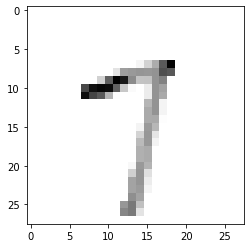

In [173]:
import matplotlib.pyplot as plt

plt.imshow(x_train[42], cmap = plt.cm.binary) #veriyi image'e donusturme
plt.show()


In [174]:
model.save("mnist_reader.model") #modelimizi kaydettik

INFO:tensorflow:Assets written to: mnist_reader.model\assets


In [175]:
mnist = tf.keras.models.load_model("mnist_reader.model") #kaydedilmis modeli alma

In [176]:
predictions = mnist.predict([x_test]) #tahmin islemi

In [177]:
print(predictions[5])

[7.4240329e-06 9.9924409e-01 3.0783798e-05 5.4316838e-06 6.9579546e-05
 4.4260214e-06 8.6442024e-06 4.6369998e-04 1.3956199e-04 2.6453152e-05]


In [178]:
import numpy as np

pred_class = np.argmax(predictions, axis=1) #em yuksek degerli veriyinin indexini dondurur

print(pred_class[5])

1


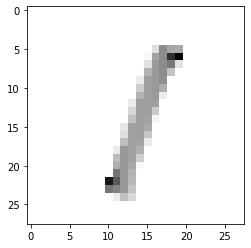

In [179]:
plt.imshow(x_test[5], cmap = plt.cm.binary)
plt.show()